In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 8})


In [2]:
runs = []
for i in range(13):
    if i<10:
        runs.append("0" + str(i))
    else:
        runs.append(str(i))

In [3]:
data_bg = {}
data_cl = {}
data_pk = {}
for i in range(len(runs)):
    data_bg[int(runs[i])] = np.loadtxt("C:/Users/tu_rk/Desktop/8vo Semestre/2. Cosmología/Proyecto2/outs/default" + runs[i] + "_background.dat").T
    data_cl[int(runs[i])] = np.loadtxt("C:/Users/tu_rk/Desktop/8vo Semestre/2. Cosmología/Proyecto2/outs/default" + runs[i] + "_cl.dat").T
    data_pk[int(runs[i])] = np.loadtxt("C:/Users/tu_rk/Desktop/8vo Semestre/2. Cosmología/Proyecto2/outs/default" + runs[i] + "_pk.dat").T


Text(0.5, 0, '$l$')

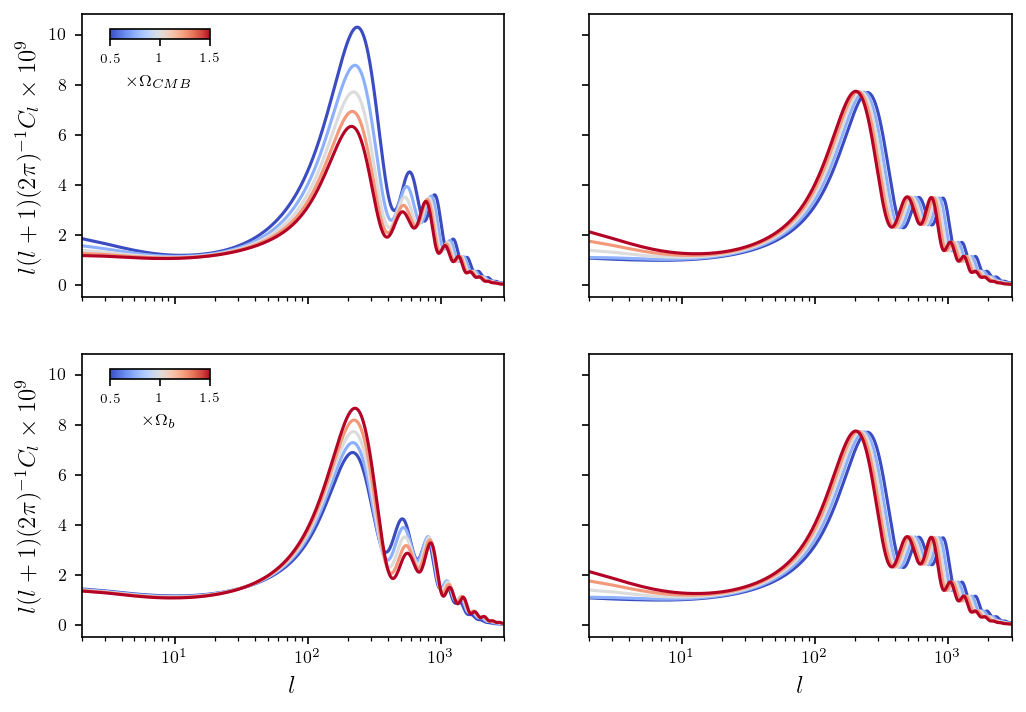

In [56]:
fig, ((ax00,ax01),(ax10,ax11)) = plt.subplots(2, 2, figsize=(8,5.5), dpi=150, sharex = True, sharey = True)
params = np.array([0.5, 0.75, 1, 1.25, 1.5])
cNorm = colors.Normalize(vmin=0.5, vmax=1.5)
cm = plt.get_cmap('coolwarm')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

rtp = [1,2,0,3,4]
for i in range(len(rtp)):
    ax10.plot(data_cl[rtp[i]][0],10e9*data_cl[rtp[i]][1],color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")
ax10.set_xscale("log")
#ax10.set_ylim(0,9.5e-10)
ax10.set_xlim(2e0,3*10e2)

cbax10 = inset_axes(ax10, width="20%", height="5%", loc=2,bbox_to_anchor=(170,180,500,200)) 
cb10 = matplotlib.colorbar.ColorbarBase(cbax10,cmap=cm, norm=cNorm, orientation='horizontal',ticks=[0.5, 1, 1.5])
cb10.set_label(r'$\times\Omega_b$')
cb10.ax.set_xticklabels([r"$0.5$",r"$1$",r"$1.5$"],fontsize = 6)

rtp = [5,6,0,7,8]
for i in range(len(rtp)):
    ax00.plot(data_cl[rtp[i]][0],10e9*data_cl[rtp[i]][1],color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

cbax11 = inset_axes(ax11, width="20%", height="5%", loc=2,bbox_to_anchor=(170,520,500,200)) 
cb11 = matplotlib.colorbar.ColorbarBase(cbax11,cmap=cm, norm=cNorm, orientation='horizontal',ticks=[0.5, 1, 1.5])
cb11.set_label(r'$\times\Omega_{CMB}$')
cb11.ax.set_xticklabels([r"$0.5$",r"$1$",r"$1.5$"],fontsize = 6)

rtp = [9,10,0,11,12]
for i in range(len(rtp)):
    ax11.plot(data_cl[rtp[i]][0],10e9*data_cl[rtp[i]][1],color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

rtp = [9,10,0,11,12]
for i in range(len(rtp)):
    ax01.plot(data_cl[rtp[i]][0],10e9*data_cl[rtp[i]][1],color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

plt.setp(ax00.get_xticklabels(), visible=False)
plt.setp(ax01.get_xticklabels(), visible=False)
plt.setp(ax01.get_yticklabels(), visible=False)
plt.setp(ax11.get_yticklabels(), visible=False)

ax10.set_ylabel(r"$l(l+1)(2\pi)^{-1}C_l\times 10^9$", fontsize  = 12)
ax10.set_xlabel(r"$l$", fontsize  = 12)
ax00.set_ylabel(r"$l(l+1)(2\pi)^{-1}C_l\times 10^9$", fontsize  = 12)
ax11.set_xlabel(r"$l$", fontsize  = 12)

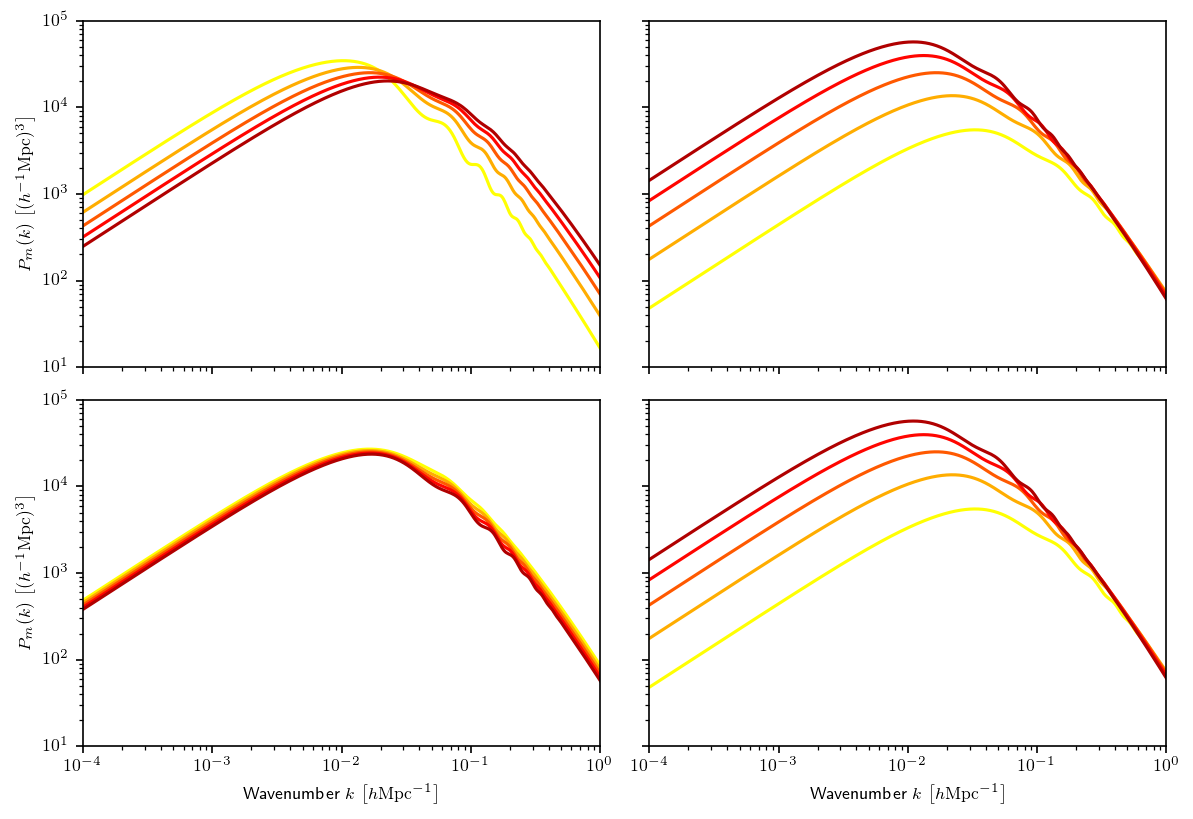

In [ ]:
fig, ((ax00,ax01),(ax10,ax11)) = plt.subplots(2, 2, figsize=(8,5.5), dpi=150, sharex = True, sharey = True)
params = np.array([0.5, 0.75, 1, 1.25, 1.5])
cNorm = colors.Normalize(vmin=0, vmax=2)
cm = plt.get_cmap('hot_r')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

rtp = [1,2,0,3,4]
for i in range(len(rtp)):
    ax10.plot(data_pk[rtp[i]][0],data_pk[rtp[i]][1],color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")
ax10.set_xscale("log")
ax10.set_yscale("log")
ax10.set_xlim(10e-5,10e-1)
ax10.set_ylim(10e0,10e4)

rtp = [5,6,0,7,8]
for i in range(len(rtp)):
    ax00.plot(data_pk[rtp[i]][0],data_pk[rtp[i]][1],color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

rtp = [9,10,0,11,12]
for i in range(len(rtp)):
    ax11.plot(data_pk[rtp[i]][0],data_pk[rtp[i]][1],color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

rtp = [9,10,0,11,12]
for i in range(len(rtp)):
    ax01.plot(data_pk[rtp[i]][0],data_pk[rtp[i]][1],color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

plt.setp(ax00.get_xticklabels(), visible=False)
plt.setp(ax01.get_xticklabels(), visible=False)
plt.setp(ax01.get_yticklabels(), visible=False)
plt.setp(ax11.get_yticklabels(), visible=False)

ax10.set_ylabel(r"$P_m(k)$ $\left[(h^{-1} \rm{Mpc})^{3}\right]$")
ax10.set_xlabel(r"Wavenumber $k$ $\left[h \rm{Mpc}^{-1}\right]$")
ax00.set_ylabel(r"$P_m(k)$ $\left[(h^{-1} \rm{Mpc})^{3}\right]$")
ax11.set_xlabel(r"Wavenumber $k$ $\left[h \rm{Mpc}^{-1}\right]$")

plt.tight_layout()

C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\1439402469.py:16: RuntimeWarning: divide by zero encountered in log10
  ax10.plot(data_bg[rtp[i]][0], 5*np.log10(data_bg[rtp[i]][6])+25,color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\1439402469.py:16: RuntimeWarning: divide by zero encountered in log10
  ax10.plot(data_bg[rtp[i]][0], 5*np.log10(data_bg[rtp[i]][6])+25,color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\1439402469.py:16: RuntimeWarning: divide by zero encountered in log10
  ax10.plot(data_bg[rtp[i]][0], 5*np.log10(data_bg[rtp[i]][6])+25,color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\1439402469.py:16: RuntimeWarning: divide by zero encountered in log10
  ax10.plot(data_bg[rtp[i]][

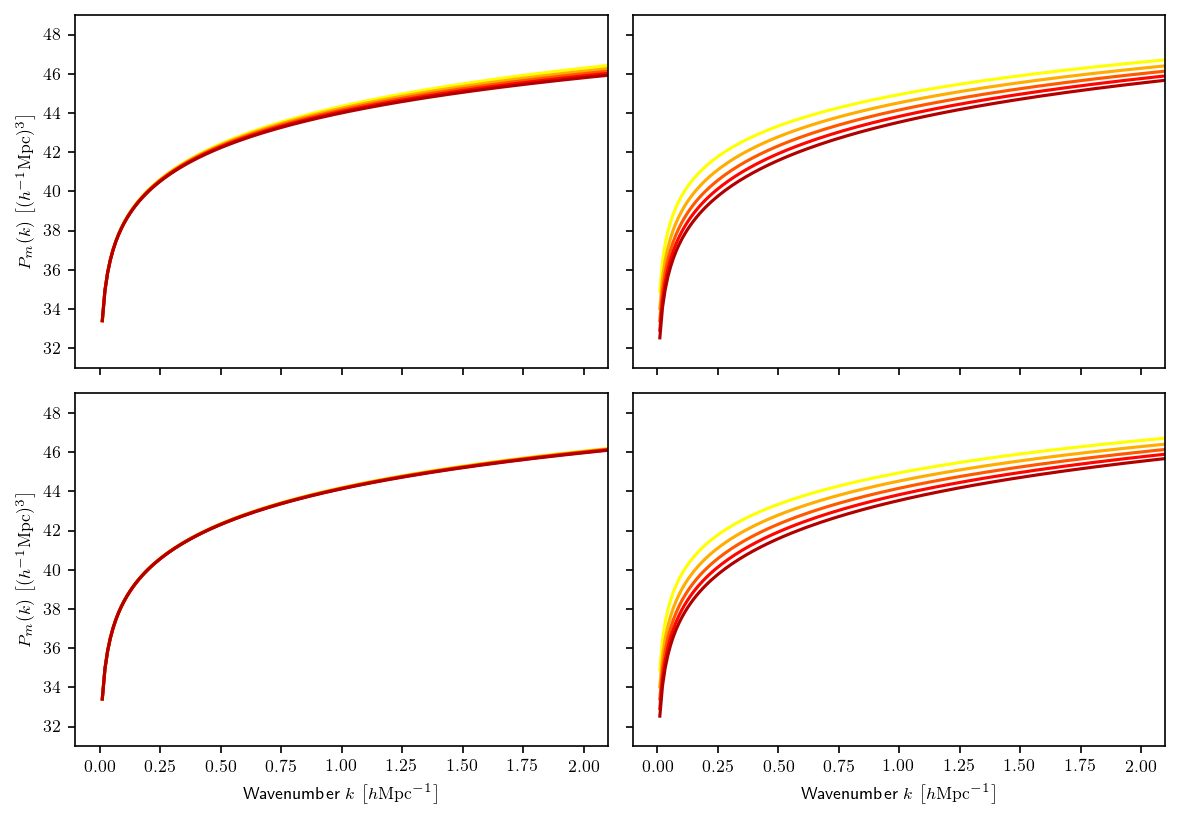

In [19]:
# import pandas to read experimental data
import pandas as pd
df_mu = pd.read_csv("mu.csv")
z_exp = np.array(df_mu["z"])
mu_exp = np.array(df_mu["mu"])
error_exp = np.array(df_mu["error"])

fig, ((ax00,ax01),(ax10,ax11)) = plt.subplots(2, 2, figsize=(8,5.5), dpi=150, sharex = True, sharey = True)
params = np.array([0.5, 0.75, 1, 1.25, 1.5])
cNorm = colors.Normalize(vmin=0, vmax=2)
cm = plt.get_cmap('hot_r')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

rtp = [1,2,0,3,4]
for i in range(len(rtp)):
    ax10.plot(data_bg[rtp[i]][0], 5*np.log10(data_bg[rtp[i]][6])+25,color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")
ax10.set_ylim(31,49)
ax10.set_xlim(-0.1,2.1)

rtp = [5,6,0,7,8]
for i in range(len(rtp)):
    ax00.plot(data_bg[rtp[i]][0], 5*np.log10(data_bg[rtp[i]][6])+25,color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

rtp = [9,10,0,11,12]
for i in range(len(rtp)):
    ax11.plot(data_bg[rtp[i]][0], 5*np.log10(data_bg[rtp[i]][6])+25,color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

rtp = [9,10,0,11,12]
for i in range(len(rtp)):
    ax01.plot(data_bg[rtp[i]][0], 5*np.log10(data_bg[rtp[i]][6])+25,color = scalarMap.to_rgba(params[i]), label = r"$\Omega_b = $" + str(params[i]) + r" $\Omega_b$")

plt.setp(ax00.get_xticklabels(), visible=False)
plt.setp(ax01.get_xticklabels(), visible=False)
plt.setp(ax01.get_yticklabels(), visible=False)
plt.setp(ax11.get_yticklabels(), visible=False)

ax10.set_ylabel(r"$P_m(k)$ $\left[(h^{-1} \rm{Mpc})^{3}\right]$")
ax10.set_xlabel(r"Wavenumber $k$ $\left[h \rm{Mpc}^{-1}\right]$")
ax00.set_ylabel(r"$P_m(k)$ $\left[(h^{-1} \rm{Mpc})^{3}\right]$")
ax11.set_xlabel(r"Wavenumber $k$ $\left[h \rm{Mpc}^{-1}\right]$")

plt.tight_layout()

C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\2056506817.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, label=r"$\mu(z)$")
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\2056506817.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, label=r"$\mu(z)$")
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\2056506817.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, label=r"$\mu(z)$")
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\2056506817.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, label=r"$\mu(z)$")
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_13184\2056506817.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, label=r"$\mu(z)$")


Text(0, 0.5, '$\\mu\\left(z\\right)$')

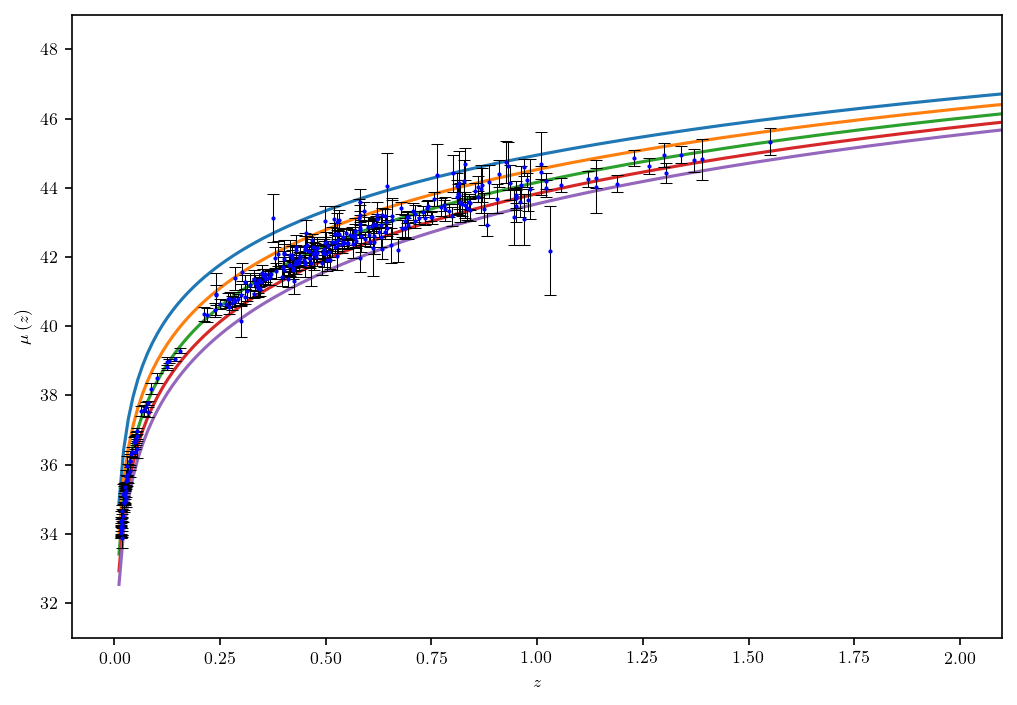

In [14]:

fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

rtp = [9,10,0,11,12]
for i in rtp:
    ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, label=r"$\mu(z)$")
ax.errorbar(z_exp,mu_exp,yerr=error_exp,fmt='.',elinewidth=0.5,capthick=0.5,capsize=3,ecolor="k",color="b",ms=2,label=r"Experimental")

ax.set_ylim(31,49)
ax.set_xlim(-0.1,2.1)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\mu\left(z\right)$")
#ax.set_title(r"Density parameters as functions of $z$")
#plt.savefig("12.mulcdm.png")